# Wavelets in Python and NCL

## PyWavelets

Wavelet analysis is accomplished in Python via external packages. NCL works with three wavelets: Morlet, DOG, and Paul. These three wavelets are continuious wavelets (CWT). 

### PyWavelets: Morlet Wavelet

The Morlet mother wavelet is a complex wavelet, with both a real and imaginary component. NCL wavelets are based on "A Practical Guide to Wavelet Analysis" (Torrence and Compo). owever, PyWavelets functions are derived from "Computational Signal Processing with Wavelets" (Teolis) (which is the same to how [Matlab is defined](https://www.mathworks.com/help/wavelet/ref/cmorwavf.html)). The differences will be noted below. In PyWavelets this is known as "cmor" (complex morlet).

In [17]:
import math # access to pi (math.pi)
import numpy as np # access to complex numbers (real and imaginary)
import cmaps # access to NCL default plot colors
import matplotlib.pyplot as plt # plot data

import pywt # PyWavelets

In [12]:
# Define the Complex Morlet
# cmorB-C
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#complex-morlet-wavelets
# B = bandwidth
# C = center frequency

bandwidth = 2 
center_freq = 6/(2*math.pi)
wavelet_mother = f"cmor{bandwidth}-{center_freq}"

In [13]:
# Download nino3 data
nino_url = 'https://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
sst_data = np.genfromtxt(nino_url, skip_header=19)

In [14]:
# PyWavelet Input Values
dt = 0.25 # sampling period (time between each y-value)
s0 = 0.25 # smallest scale
dj = 0.25 # spacing between each discrete scales
jtot = 44 # largest scale
scales = np.arange(1, jtot+1)
wavelet_coeffs, freqs = pywt.cwt(data=sst_data,
                                 scales=scales,
                                 wavelet=wavelet_mother,
                                 sampling_period=dt)

## Power Spectrum

Wavelet_coeff is a complex number with a real and an imaginary number (1 + 2i). The power spectrum plots the real component of the complex number

```
real_component = abs(wavelet_coeffs)
```

The real component represents the magntiude of the wavelet coefficient displayed as the absolute value of the coefficients squared

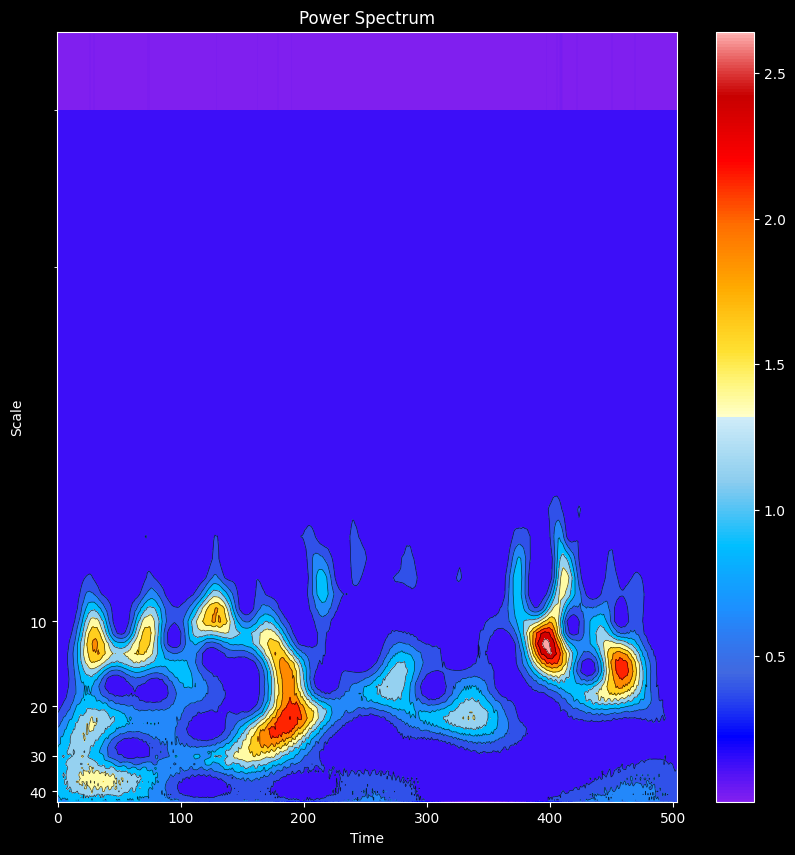

In [37]:
power = np.power((abs(wavelet_coeffs)), 2)  # compare the power spectrum (absolute value squared)

# Plot scalogram
fig, ax = plt.subplots(figsize=(10, 10))
plt.style.use('dark_background')

ax.set_yscale("symlog")
ax.invert_yaxis()
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_yticklabels([10, 20, 30, 40, 50])

plt.contourf(power,
             vmax=(power).max(), vmin=(power).min(),
             cmap=cmaps.ncl_default, levels=10)
plt.contour(power, levels=10, colors="k", linewidths=0.5, alpha=0.75)

plt.title("Power Spectrum")
plt.xlabel("Time")
plt.ylabel("Scale")
plt.imshow(power, 
           vmax=(power).max(), vmin=(power).min(),
           cmap=cmaps.ncl_default, aspect="auto")
plt.colorbar()
plt.show()

# Wavelets in NCL

Start by creating an NCL enviroiment

Create [new conda environment](https://www.ncl.ucar.edu/Download/conda.shtml)Create [new conda environment](https://www.ncl.ucar.edu/Download/conda.shtml)

```
conda create -n ncl_stable -c conda-forge ncl
```

Activate new environment

```
source activate ncl_stable
```

Run power spectrum within ncl directory

```
ncl wavelet_POWER.ncl
```

wavelet_POWER.ncl:

![ncl_output_1](ncl_power_output.000001.png)

![ncl_output_2](ncl_power_output.000002.png)